# Zomoto Data Analysis

# import libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


 # data upload

In [15]:
data=pd.read_csv("Zomato data .csv")
data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


# create function to convert rating

In [16]:
def convertno(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)
data['rate']=data['rate'].apply(convertno)
data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [17]:
data.describe()

,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


In [18]:
data.info

<bound method DataFrame.info of                       name online_order book_table  rate  votes  \
0                    Jalsa          Yes        Yes   4.1    775   
1           Spice Elephant          Yes         No   4.1    787   
2          San Churro Cafe          Yes         No   3.8    918   
3    Addhuri Udupi Bhojana           No         No   3.7     88   
4            Grand Village           No         No   3.8    166   
..                     ...          ...        ...   ...    ...   
143       Melting Melodies           No         No   3.3      0   
144        New Indraprasta           No         No   3.3      0   
145           Anna Kuteera          Yes         No   4.0    771   
146                 Darbar           No         No   3.0     98   
147          Vijayalakshmi          Yes         No   3.9     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2         

# majority of resturent

Text(0.5, 0, 'types of resturent')

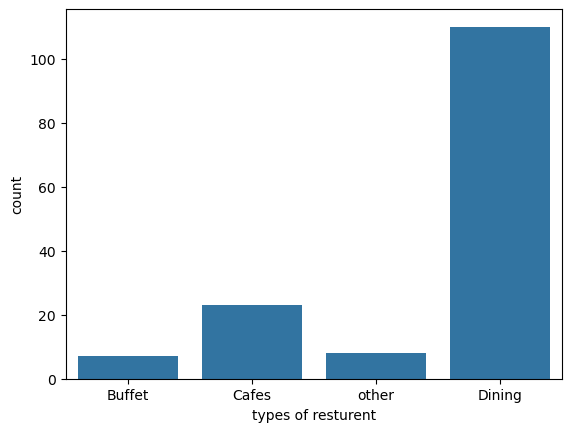

In [19]:
sns.countplot(x=data['listed_in(type)'])
plt.xlabel("types of resturent")
              
              

# votes by types of resturent

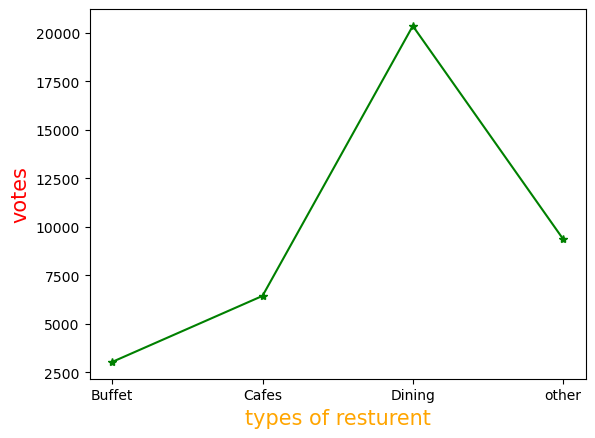

In [20]:
group=data.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':group})
plt.plot(result,c="green",marker="*")
plt.xlabel("types of resturent",c="orange",size=15)
plt.ylabel("votes",c="red",size=15)
plt.show()

# rating distribution

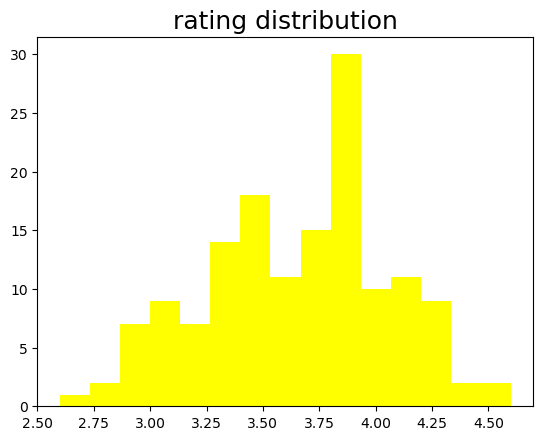

In [21]:
plt.hist(data['rate'],bins=15, color="yellow")
plt.title("rating distribution",size=18)
plt.show()

# Average order spending by couple

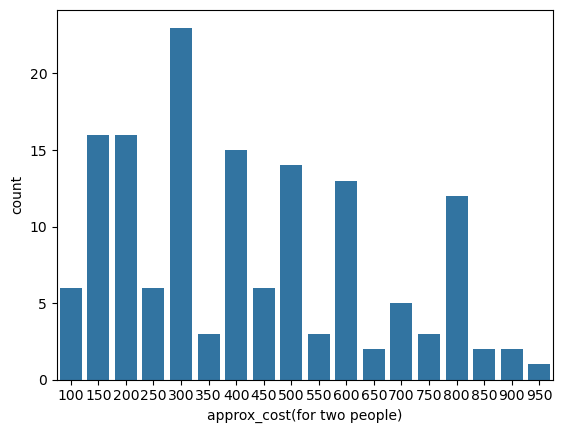

In [35]:
sns.countplot(x=data['approx_cost(for two people)'])
plt.show()

# which mode receive maximum rating

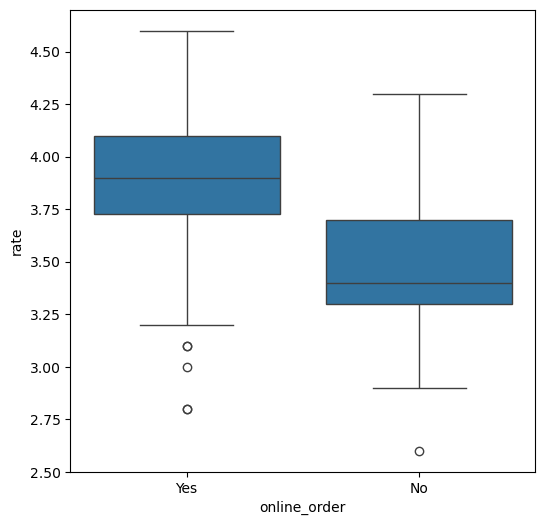

In [24]:
plt.figure(figsize=(6,6))
sns.boxplot(x="online_order",y="rate",data=data)	
plt.show()

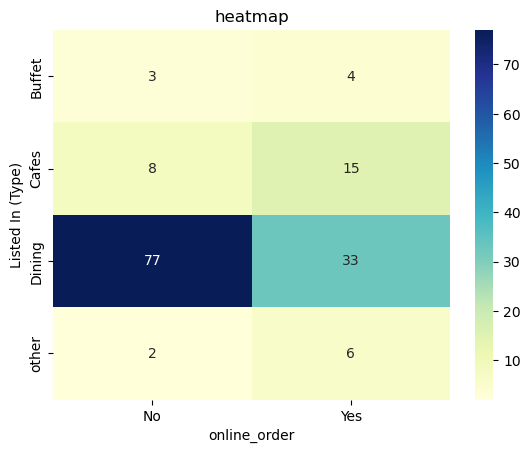

In [33]:
pivot=data.pivot_table(index='listed_in(type)',columns='online_order',values='name',aggfunc='count')
sns.heatmap(pivot,annot=True,cmap='YlGnBu',fmt='d')
plt.title("heatmap")
plt.xlabel("online_order")
plt.ylabel("Listed In (Type)")
plt.show()
            